## Needed importations

In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import folium as fl
from haversine import haversine

In [5]:
# Data uploading

df = pd.read_csv('train.csv')

In [6]:
df['Delivery_person_ID'].nunique()

1320

In [7]:
# Cleaning the datas

df2 = df.copy()
df2 = df2[df2['Delivery_person_Age'] != 'NaN ']
df2 = df2[df2['City'] != 'NaN ']
df2 = df2[df2['multiple_deliveries'] != 'NaN ']
df2 = df2[df2['Road_traffic_density'] != 'NaN ']
df2 = df2[df2['Festival'] != 'NaN ']
# Removing unnecessery information in the column 'Time_taken(min)'
# The information 'min' was removed of all lines
df2['Time_taken(min)'] = df2['Time_taken(min)'].str.split(' ').apply(lambda x: x[1])
df2['Time_taken(min)'] = df2['Time_taken(min)'].astype(int)


- ## Converting the column Age from text to number

In [8]:
df2['Delivery_person_Age'] = df2['Delivery_person_Age'].astype(int)

- ## Converting the column Ratings from text to float

In [9]:
df2['Delivery_person_Ratings'] = df2['Delivery_person_Ratings'].astype(float)

- ## Converting the column order_date from text to date

In [10]:
df2['Order_Date'] = pd.to_datetime(df2['Order_Date'], format="%d-%m-%Y")

- ## Converting the column multiple_deliveries from text to number(int)

In [11]:
df2['multiple_deliveries'] = df2['multiple_deliveries'].astype(int)

- ## Removing the empty spaces into the strings/text/object

In [12]:
df2['ID'] = df2['ID'].str.strip() # It's needed to call the method 'str' before the 'strip'

In [13]:
df2['Road_traffic_density'] = df2['Road_traffic_density'].str.strip()

In [14]:
df2['Type_of_order'] = df2['Type_of_order'].str.strip()

In [15]:
df2['Type_of_vehicle'] = df2['Type_of_vehicle'].str.strip()

In [23]:
df2['City'] = df2['City'].str.strip()

> ## 1. Order quantity per day.

In [24]:
# Number of order grouped by date

df_aux = df2.loc[:, ['ID', 'Order_Date']].groupby('Order_Date').count().reset_index()
df_aux['ID'][0]

902

In [25]:
# Drawing a graphic of bar

px.bar(df_aux, x='Order_Date', y='ID')

> ## 2. Order quantity per Week.

In [37]:
# Creating a week column 

df2['week_of_year'] = df2['Order_Date'].dt.strftime('%U') #('%U') The counting of the days start from sunday

In [38]:
# Grouping the number of orders by week of the year

#df['week_of_year'] = df['week_of_year'].astype(int)
df_aux = df2[['ID', 'week_of_year']].groupby('week_of_year').count().reset_index()
df_aux.head(5)

,week_of_year,ID
0,06,1695
1,07,4941
2,09,4947
3,10,6700
4,11,6844


In [39]:
# Creating a graphic of lines

px.line(df_aux, x='week_of_year', y='ID')

> ## 3. Order distribution by type of traffic.

In [40]:
df_aux = df2[['ID', 'Road_traffic_density']].groupby('Road_traffic_density').count().reset_index()
df_aux['percentage'] = df_aux['ID']/df_aux['ID'].sum()
df_aux

,Road_traffic_density,ID,percentage
0,High,4105,0.099109
1,Jam,13174,0.318067
2,Low,14002,0.338057
3,Medium,10138,0.244767


In [41]:
# Making a graphic of pizza

px.pie(df_aux, values='percentage', names='Road_traffic_density')

> ## 4. Order's volume Comparison by city and type of traffic.

In [42]:
df_aux = df2[['ID', 'City', 'Road_traffic_density']].groupby(['City', 'Road_traffic_density']).count().reset_index()
df_aux

,City,Road_traffic_density,ID
0,Metropolitian,High,3208
1,Metropolitian,Jam,10561
2,Metropolitian,Low,10195
3,Metropolitian,Medium,7899
4,Semi-Urban,High,16
5,Semi-Urban,Jam,126
6,Semi-Urban,Medium,10
7,Urban,High,881
8,Urban,Jam,2487
9,Urban,Low,3807


In [43]:
# Creating a bubble graphic

px.scatter(df_aux, x='City', y='Road_traffic_density', size='ID', color='City')

>## 5. Order quantity per delivery person and per week

In [46]:
# Grouping the quantity of orders by week of year
df_aux01 = df2[['ID', 'week_of_year']].groupby('week_of_year').count().reset_index()
# Grouping the quantity of orders by unique id of delivery person
df_aux02 = df2[['Delivery_person_ID', 'week_of_year']].groupby('week_of_year').nunique().reset_index()
# merging both dataframes
df_aux = pd.merge(df_aux01, df_aux02, how='inner')
# Quantity of delivery by each delivery person in a certain week of the year = qd_bydp_week
df_aux['qd_bydp_week'] = df_aux['ID']/df_aux['Delivery_person_ID']
df_aux

,week_of_year,ID,Delivery_person_ID,qd_bydp_week
0,06,1695,598,2.834448
1,07,4941,600,8.235000
2,09,4947,720,6.870833
3,10,6700,720,9.305556
4,11,6844,720,9.505556
5,12,5806,720,8.063889
6,13,6657,720,9.245833
7,14,3829,719,5.325452


In [47]:
# Creating a line graphic 
px.line(df_aux, x='week_of_year', y='qd_bydp_week')

>## 6. The central location of each city by type of traffic

In [48]:
df_aux = df2[['City', 'Road_traffic_density', 'Delivery_location_latitude', 'Delivery_location_longitude']].groupby(['City', 'Road_traffic_density']).median().reset_index()
df_aux

,City,Road_traffic_density,Delivery_location_latitude,Delivery_location_longitude
0,Metropolitian,High,18.573935,76.305554
1,Metropolitian,Jam,18.660963,76.017648
2,Metropolitian,Low,18.629156,75.993365
3,Metropolitian,Medium,18.644080,76.019490
4,Semi-Urban,High,20.463477,76.814977
5,Semi-Urban,Jam,17.539886,76.692844
6,Semi-Urban,Medium,21.251581,77.731931
7,Urban,High,18.947584,75.923365
8,Urban,Jam,18.653481,75.979490
9,Urban,Low,18.612718,75.953365


In [49]:
# Drawing a map 

_map = fl.Map()

for index, location in df_aux.iterrows():
    fl.Marker([location['Delivery_location_latitude'], 
               location['Delivery_location_longitude']]).add_to(_map)
_map

># The delivery person view

>## 1. The lowest and highest age of the delivery person.

In [195]:
print(f'''The lowest age is {df2['Delivery_person_Age'].min()}
and the highest age is {df2['Delivery_person_Age'].max()}''')

The lowest age is 20
and the highest age is 39


>## 2. The worst and best vehicle condition

In [196]:
print(f'''The worst  vehicle condition is {df2['Vehicle_condition'].min()}
and the best vehicle condition is {df2['Vehicle_condition'].max()}''')

The worst  vehicle condition is 0
and the best vehicle condition is 2


>## 3. The average rating per delivery person.

In [197]:
avg_ratings_dperson = df2[['Delivery_person_ID', 'Delivery_person_Ratings']].groupby('Delivery_person_ID').mean().reset_index()
avg_ratings_dperson

,Delivery_person_ID,Delivery_person_Ratings
0,AGRRES010DEL01,4.761538
1,AGRRES010DEL02,4.671429
2,AGRRES010DEL03,4.575000
3,AGRRES01DEL01,4.522222
4,AGRRES01DEL02,4.700000
...,...,...
1315,VADRES19DEL02,4.632727
1316,VADRES19DEL03,4.670270
1317,VADRES20DEL01,4.620370
1318,VADRES20DEL02,4.591111


>## 4. The average rating and standard deviation per traffic type.

In [198]:
std_avg_rating_by_trafic = (df2[['Delivery_person_Ratings', 'Road_traffic_density']]
            .groupby('Road_traffic_density').agg({'Delivery_person_Ratings':['mean', 'std']}))

std_avg_rating_by_trafic.columns = ['delivery_avg', 'delivery_std']
std_avg_rating_by_trafic = std_avg_rating_by_trafic.reset_index()
std_avg_rating_by_trafic

,Road_traffic_density,delivery_avg,delivery_std
0,High,4.652230,0.273044
1,Jam,4.594019,0.329778
2,Low,4.645011,0.338080
3,Medium,4.660138,0.274245


>## 5. The average rating and standard deviation per weather conditions.

In [199]:
std_avg_rating_by_weatherconditions = (df2[['Delivery_person_Ratings', 'Weatherconditions']]
            .groupby('Weatherconditions').agg({'Delivery_person_Ratings':['mean', 'std']}))

std_avg_rating_by_weatherconditions.columns = ['delivery_avg', 'delivery_std']
std_avg_rating_by_weatherconditions = std_avg_rating_by_weatherconditions.reset_index()
std_avg_rating_by_weatherconditions

,Weatherconditions,delivery_avg,delivery_std
0,conditions Cloudy,4.651871,0.281197
1,conditions Fog,4.652965,0.275060
2,conditions Sandstorms,4.611748,0.310852
3,conditions Stormy,4.611819,0.313096
4,conditions Sunny,4.654868,0.396674
5,conditions Windy,4.616128,0.304565


>## 6. The 10 fastest delivery person  per city.

In [206]:
df_aux = (df2[['Delivery_person_ID', 'City', 'Time_taken(min)']]
          .groupby(['City', 'Delivery_person_ID']).mean()
          .reset_index())

# The 10 fastest delivery person in Metropolitian
fastest_Metropolitian = (df_aux[df_aux['City'] == 'Metropolitian']
                         .sort_values('Time_taken(min)').head(10))

# The 10 fastest delivery person in Urban
fastest_Urban = (df_aux[df_aux['City'] == 'Urban']
                         .sort_values('Time_taken(min)').head(10))

# The 10 fastest delivery person in Semi-Urban
fastest_Semi_Urban = (df_aux[df_aux['City'] == 'Semi-Urban']
                         .sort_values('Time_taken(min)').head(10))

In [65]:
df3 = pd.concat([fastest_Metropolitian, fastest_Urban, fastest_Semi_Urban])
df3['Time_taken(min)'] = round(df3['Time_taken(min)'], 2)
df3

,City,Delivery_person_ID,Time_taken(min)
730,Metropolitian,KNPRES03DEL02,15.75
67,Metropolitian,ALHRES02DEL02,17.80
845,Metropolitian,KOLRES01DEL03,19.12
723,Metropolitian,KNPRES01DEL01,19.12
787,Metropolitian,KOCRES02DEL02,19.25
806,Metropolitian,KOCRES08DEL03,19.80
827,Metropolitian,KOCRES16DEL03,20.00
788,Metropolitian,KOCRES02DEL03,20.38
519,Metropolitian,GOARES14DEL01,20.40
479,Metropolitian,DEHRES20DEL03,20.43


>## 7. The 10 lowest delivery person  per city.

In [ ]:
# The 10 lowest delivery person in Metropolitian
lowest_Metropolitian = (df_aux[df_aux['City'] == 'Metropolitian']
                         .sort_values('Time_taken(min)', ascending=False).head(10))

# The 10 lowest delivery person in Urban
lowest_Urban = (df_aux[df_aux['City'] == 'Urban']
                         .sort_values('Time_taken(min)', ascending=False).head(10))

# The 10 lowest delivery person in Semi-Urban
lowest_Semi_Urban = (df_aux[df_aux['City'] == 'Semi-Urban']
                         .sort_values('Time_taken(min)', ascending=False).head(10))

In [ ]:
df4 = pd.concat([lowest_Metropolitian, lowest_Urban, lowest_Semi_Urban])
df4

># The Restaurants view

>## 1. The quantity of delivery person.


In [ ]:
print(f"The quantity of delivery person is {len(df2['Delivery_person_ID'].unique())}.")

>## 2. The average distance from the restaurant to the delivery location.


In [95]:
# It will necessary to use the 'haversine' module 
cols = ['Restaurant_latitude', 'Restaurant_longitude', 
        'Delivery_location_latitude', 'Delivery_location_longitude']


df2['Distance(km)'] = (df2[cols].apply(lambda x: haversine((x[0], x[1]), (x[2], x[3])), axis=1))

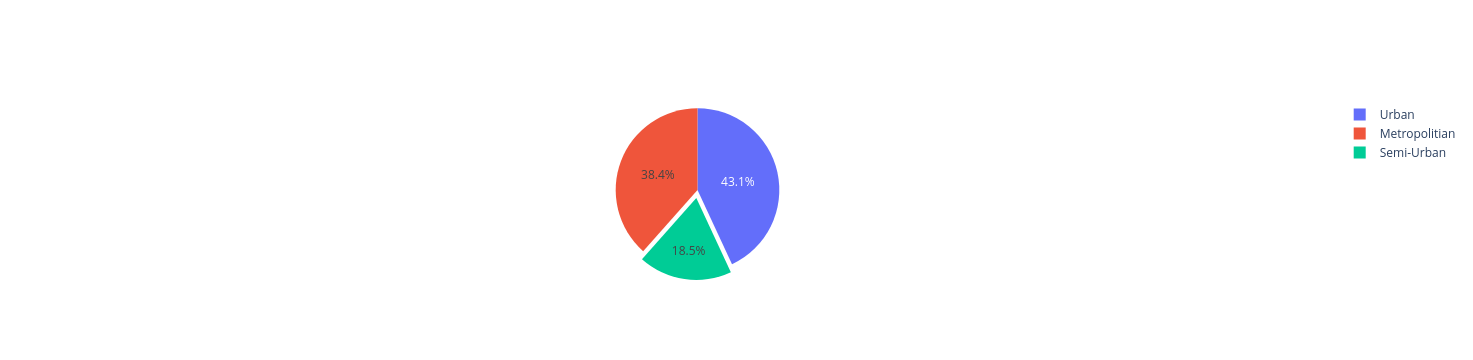

In [98]:
avg_distance = df2['Distance(km)'].mean()
avg_distance_by_city = df2[['City', 'Distance(km)']].groupby('City').mean().reset_index()
avg_distance_by_city

#Drawing a Pie Graphic
fig = go.Figure( data = [go.Pie(labels = avg_distance_by_city["City"], 
                values = avg_distance_by_city['Distance(km)'], pull=[0, 0.1, 0])])
fig.show()

>## 3. The average time and standard deviation per delivery and city

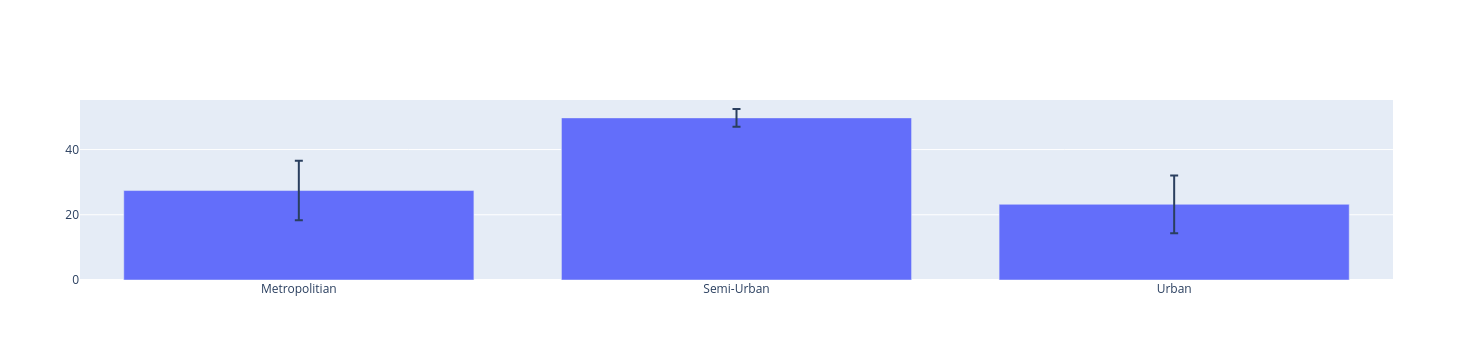

In [100]:
df_aux = (df2[['City', 'Time_taken(min)',]].groupby('City')
          .agg({'Time_taken(min)': ['mean', 'std']}))
df_aux.columns = ['Time_avg', 'Time_std']
df_aux = df_aux.reset_index()
df_aux

fig = go.Figure()

fig.add_trace(go.Bar(name='Control',
                    x=df_aux['City'],
                    y=df_aux['Time_avg'],
                    error_y= dict(type = 'data', array=df_aux['Time_std'])))

fig.update_layout(barmode='group')
fig.show()



>## 4. The average time and standard deviation of delivery per city and kind of order

In [216]:
df_aux = (df2[['City','Type_of_order', 'Time_taken(min)',]].groupby(['City', 'Type_of_order'])
          .agg({'Time_taken(min)': ['mean', 'std']}))
df_aux.columns = ['Time_avg', 'Time_std']
df_aux = df_aux.reset_index()
df_aux

,City,Type_of_order,Time_avg,Time_std
0,Metropolitian,Buffet,27.299008,9.153107
1,Metropolitian,Drinks,27.322691,9.041655
2,Metropolitian,Meal,27.616383,9.214536
3,Metropolitian,Snack,27.468414,9.119676
4,Semi-Urban,Buffet,49.707317,2.731702
5,Semi-Urban,Drinks,49.625000,2.459347
6,Semi-Urban,Meal,50.300000,3.041665
7,Semi-Urban,Snack,49.408163,2.707385
8,Urban,Buffet,23.560652,9.056348
9,Urban,Drinks,23.311977,8.927314


>## 5. The average time and standard deviation of delivery per city and kind of traffic

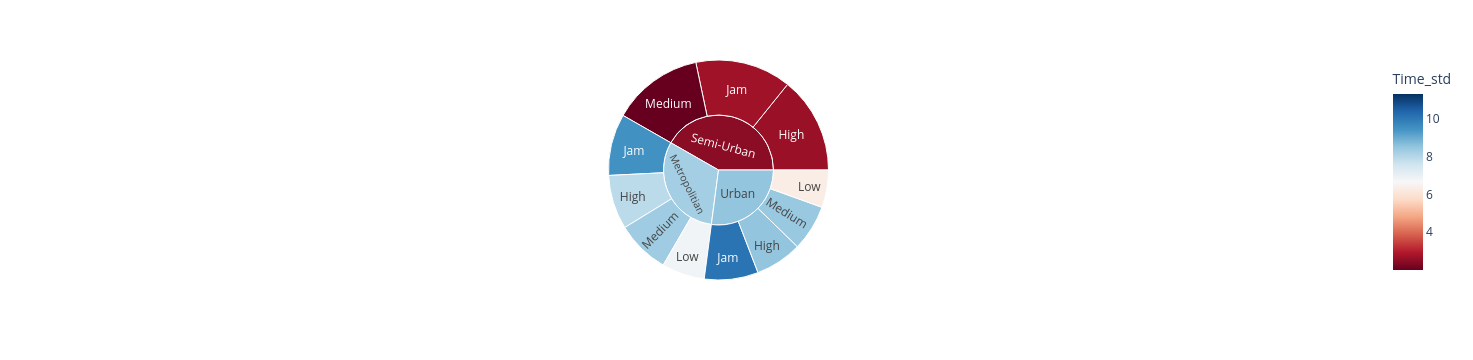

In [215]:
df_aux = (df2[['City','Road_traffic_density', 'Time_taken(min)',]].groupby(['City', 'Road_traffic_density'])
          .agg({'Time_taken(min)': ['mean', 'std']}))
df_aux.columns = ['Time_avg', 'Time_std']
df_aux = df_aux.reset_index()

fig = px.sunburst(df_aux, path=['City', 'Road_traffic_density'], values='Time_avg', 
                 color='Time_std', color_continuous_scale='RdBu', 
                 color_continuous_midpoint=np.average(df_aux['Time_std']))
fig.show()

>## 6. The average time of delivery during Festivals

In [211]:
df_aux = df2[['Festival', 'Time_taken(min)']].groupby('Festival').agg({'Time_taken(min)': ['mean', 'std']})
df_aux.columns = ['del_time_avg', 'del_time_std']
df_aux = df_aux.reset_index()
df_aux

,Festival,del_time_avg,del_time_std
0,No,26.162741,9.001803
1,Yes,45.518607,4.005399
